In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
def f(x):
    return math.cos(x)

In [4]:
def make_system(n, x_0, x_n, y_0, y_n):
    
    h = (x_n - x_0)/n
    
    a = []
    b = []
    c = []
    d = []

    a.append(0)
    b.append(1)
    c.append(0)

    for i in range(1, n):
        a.append(1)
        b.append(-2)
        c.append(1)
    
    a.append(0)
    b.append(1)
    c.append(0)
    
    d = []
    x = []

    d.append(y_0)
    x.append(x_0)

    for i in range(1,n):
        x_i = x_0 + h*i
        d.append((h ** 2) * f(x_i))
        x.append(x_i)

    d.append(y_n)
    x.append(x_n)
    
    A = [a, b, c]
    
    return A, d, x



In [5]:
def solve_3diag(A, d, n):    
    d_new = d.copy()
    b_new = A[1].copy()
    c_new = A[2].copy()
    a_new = A[0].copy()
    
    for i in range(1, n+1):
        k = a_new[i] / b_new[i-1]
        b_new[i] -= k*c_new[i-1]
        d_new[i] -= k*d_new[i-1]
    
    y = [i for i in range(n+1)]
    y[n] = d_new[n]/b_new[n]
    
    for i in range(n-1, -1, -1):
        y[i] = (d_new[i] - c_new[i]*y[i+1])/b_new[i]
        
    return y

In [58]:
x_0 =0 # - math.pi / 2
x_n =2 # math.pi / 2 

y_0 = lambda x: -math.cos(x)
y_n = lambda x: -math.cos(x)

In [59]:
# y_0 = 0
# y_n = 0

n = 50
h = (x_n - x_0)/n

A, d, x = make_system(n, x_0, x_n, y_0(x_0), y_n(x_n))
y = solve_3diag(A, d, n)

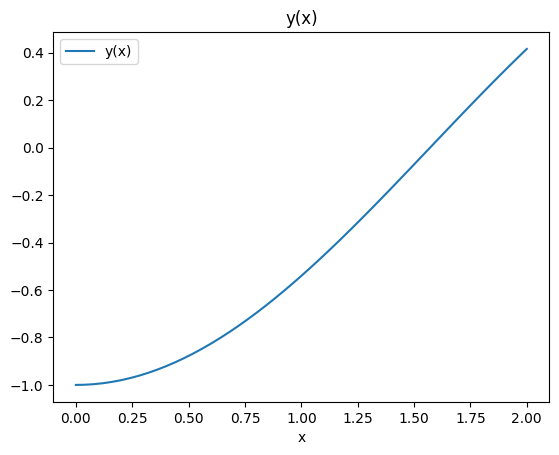

In [60]:
plt.plot(x, y, label="y(x)")
plt.xlabel('x')
plt.title('y(x)')
plt.legend()
plt.show()